In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## EDA

- Binary classification

In [2]:
df = pd.read_csv("titanic/train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
list(df.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [5]:
df.shape

(891, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### No duplicated data

In [8]:
len(df[df.duplicated()])

0

In [9]:
# rename columns
df.rename(columns={
    "PassengerId": "id", 
    "Survived": "target",
    "Pclass":"pclass",
    "Name": "name",
    "Sex": "sex",
    "Age" : "age",
    "SibSp" : "sibsip",
    "Parch": "parch",
    "Ticket":"ticket",
    "Fare":"fare",
    "Cabin" : "cabin",
    "Embarked" : "embarked"
}, inplace=True)

### Analysis of Pclass variable

- No Missing variables
- Categorical variable (Already cleaned)
    - 1 - upper class
    - 2 - Middle clas
    - 3 - lower class
- Change the order of the class so as to reflect socio-economic status

In [10]:
df["pclass"].value_counts()

pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [11]:
df["pclass"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: pclass
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [12]:
def catergorical_plot(x_ax, title, x_label,y_label=None):
    plt.figure(figsize=(10,5))
    sns.countplot(df,x=x_ax)
    plt.title(title)
    plt.xlabel(x_label)
    plt.show()

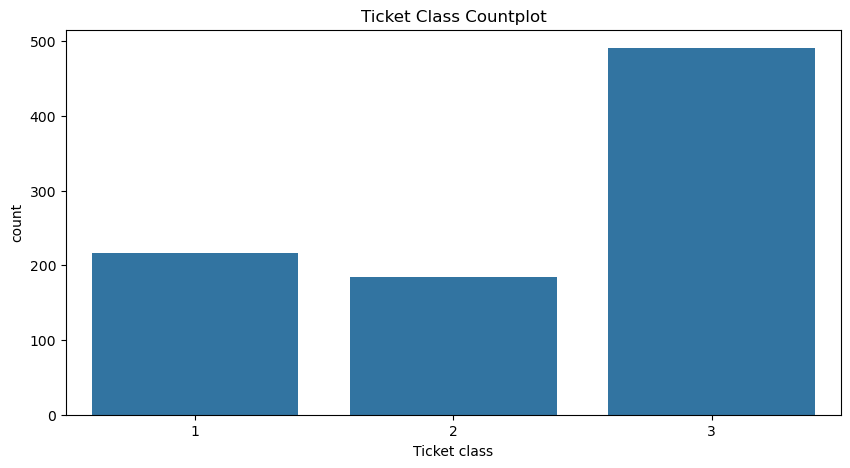

In [13]:
catergorical_plot("pclass", "Ticket Class Countplot", "Ticket class")

## Analysis for Sex variable

- No missing data
- Categorial data
    - One-hot encoding
    

In [14]:
df["sex"].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

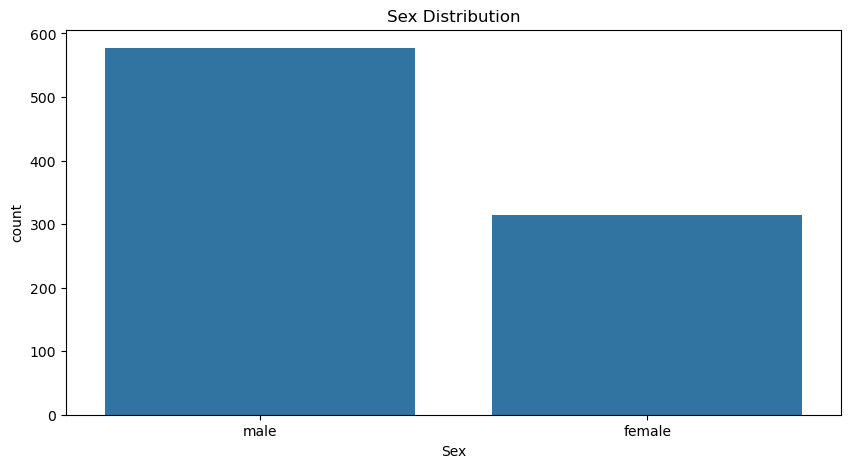

In [15]:
# countplot for sex distibution
catergorical_plot("sex", "Sex Distribution", "Sex")

## Analysis for Age Variable
- Missing values in age, fill with the median age
- Average age is 29, Median 28
- Categorize the data into age group during feature engineering

In [16]:
df["age"].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: age, dtype: float64

In [17]:
df["age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

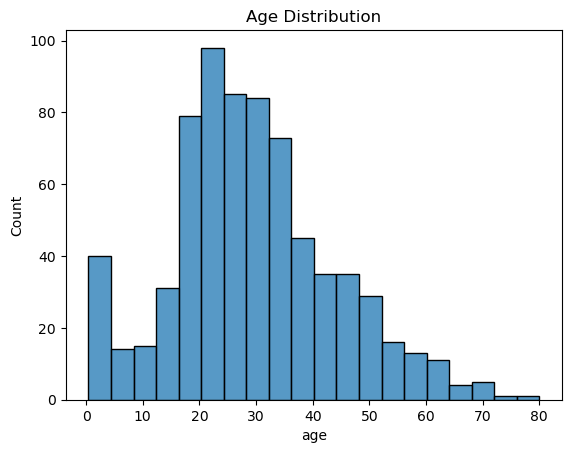

In [18]:
sns.histplot(data=df,x='age')
plt.title('Age Distribution');
plt.show()

In [19]:
# bins = [0, 12, 18, 35, 60, 100]
# labels = ['Child', 'Teenager', 'Adult', 'Middle-aged', 'Senior']
# df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

In [20]:
df.head()

,id,target,pclass,name,sex,age,sibsip,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
df[~df["age"].isna()].head()

,id,target,pclass,name,sex,age,sibsip,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Analysis for sib/sp (Siblings/Spouse on board)

- Numerical data
- No missing value

In [22]:
df["sibsip"].describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: sibsip, dtype: float64

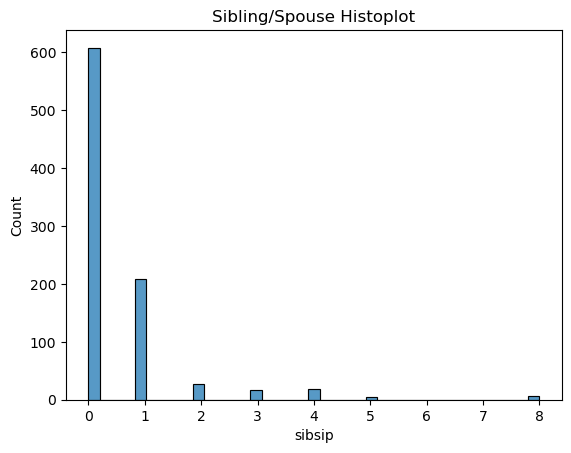

<Figure size 1000x1000 with 0 Axes>

In [23]:
sns.histplot(data=df, x="sibsip")
plt.title("Sibling/Spouse Histoplot")
plt.figure(figsize=(10,10));
plt.show()

## Analysis for No of parents / children aboard the Titanic

- Numerical Data
- No missing data


In [24]:
df["parch"].describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: parch, dtype: float64

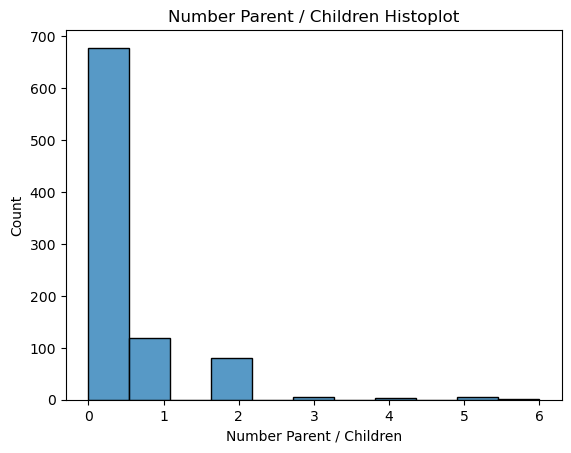

<Figure size 1000x1000 with 0 Axes>

In [25]:
sns.histplot(data=df, x="parch")
plt.title("Number Parent / Children Histoplot")
plt.xlabel("Number Parent / Children")
plt.figure(figsize=(10,10));
plt.show()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        891 non-null    int64  
 1   target    891 non-null    int64  
 2   pclass    891 non-null    int64  
 3   name      891 non-null    object 
 4   sex       891 non-null    object 
 5   age       714 non-null    float64
 6   sibsip    891 non-null    int64  
 7   parch     891 non-null    int64  
 8   ticket    891 non-null    object 
 9   fare      891 non-null    float64
 10  cabin     204 non-null    object 
 11  embarked  889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Ticket Analysis

- object data type
- No missing data
- It seems the Ticket are given based on the family registration
<!-- - Target Encoding -->
- Drop Ticket since its does not contribute anything new to the model --> like id

In [27]:
df["ticket"].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: ticket, dtype: object

In [28]:
df["ticket"].isna().sum()

0

In [29]:
df["ticket"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: ticket
Non-Null Count  Dtype 
--------------  ----- 
891 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


In [30]:
df["ticket"].describe()

count        891
unique       681
top       347082
freq           7
Name: ticket, dtype: object

In [31]:
df["ticket"].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: ticket, dtype: object

In [32]:
df["ticket"].value_counts().head(10)

ticket
347082          7
CA. 2343        7
1601            7
3101295         6
CA 2144         6
347088          6
S.O.C. 14879    5
382652          5
LINE            4
PC 17757        4
Name: count, dtype: int64

## Fare Analysis

- Datatype : float
- No missing values
- present of outlier

In [33]:
df["fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

In [34]:
df["fare"].value_counts()

fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64

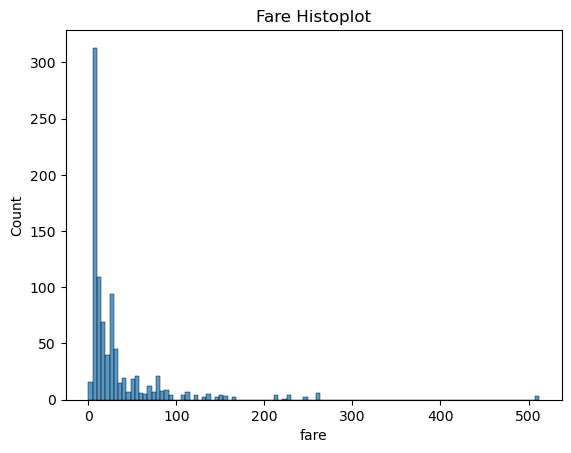

<Figure size 640x480 with 0 Axes>

In [35]:
sns.histplot(df, x="fare")
plt.title("Fare Histoplot")
plt.figure()
plt.show()

## Cabin Analysis

- present of missing values
- 147 unique data
- 687 missing data
- data-type is String
- replace missing values with "missing"
- encode with frequency (Frequency Encode)
- Better still use only the first letter to represent each cabin
<!-- - Probal -->

In [36]:
df["cabin"].value_counts()

cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [37]:
df.cabin.describe()

count         204
unique        147
top       B96 B98
freq            4
Name: cabin, dtype: object

In [38]:
df["cabin"].isna().sum()

687

In [39]:
df[df["pclass"] == 1 & ~df["cabin"].isna()].tail()

,id,target,pclass,name,sex,age,sibsip,parch,ticket,fare,cabin,embarked
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Analysis of Embarked cols

- Categorical data (3 categories)
- Port of Embarkation
- 2 missing inputs
- Probabily fill with it mode

In [40]:
df["embarked"].head()

0    S
1    C
2    S
3    S
4    S
Name: embarked, dtype: object

In [41]:
df["embarked"].value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [42]:
df["embarked"].describe()

count     889
unique      3
top         S
freq      644
Name: embarked, dtype: object

In [43]:
# check for missing values in embarked cols
df["embarked"].isna().sum()

2

In [44]:
df[df["embarked"].isna()]

,id,target,pclass,name,sex,age,sibsip,parch,ticket,fare,cabin,embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


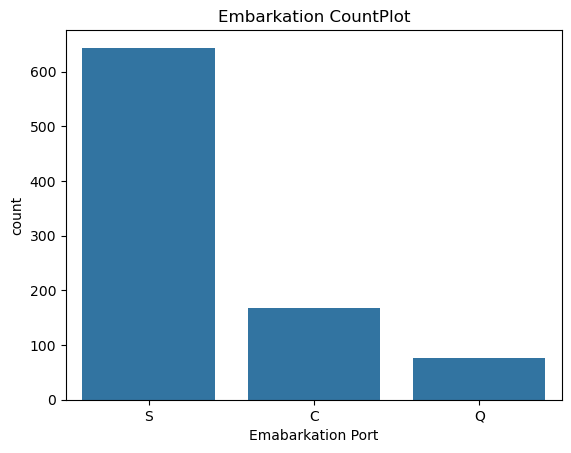

In [45]:
sns.countplot(df, x='embarked')
plt.xlabel("Emabarkation Port")
plt.title("Embarkation CountPlot")
plt.show()

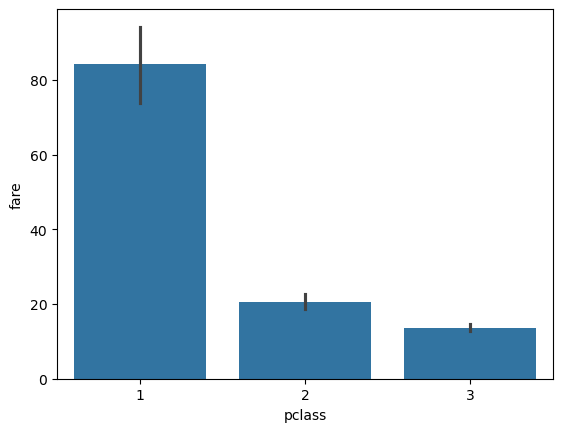

In [46]:
sns.barplot(x="pclass", y="fare", data=df)
plt.show()

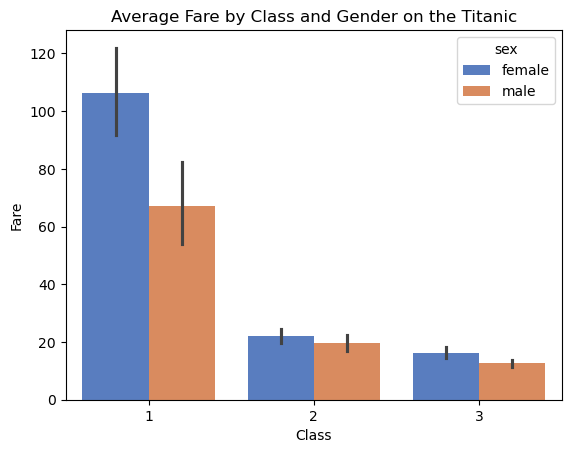

In [47]:
sns.barplot(x="pclass", y="fare", hue="sex", palette="muted", data=df)




# add labels and title

plt.xlabel("Class")

plt.ylabel("Fare")

plt.title("Average Fare by Class and Gender on the Titanic")




# display the plot

plt.show()

# Train-Validation split

### Looking for correlation

In [48]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix["target"].sort_values(ascending=False)

target    1.000000
fare      0.257307
parch     0.081629
id       -0.005007
sibsip   -0.035322
age      -0.077221
pclass   -0.338481
Name: target, dtype: float64

### Preprocessing pclass and cabin features

In [49]:
df["cabin"]

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: cabin, Length: 891, dtype: object

In [50]:
def  preprocessing_plcass_cabin(df):
    # drop name column
    df.drop("name", axis=1, inplace=True)
    # replace missing values with missing
    df["cabin"] = df["cabin"].fillna(value ="missing")
    # use the first letter of cabin name
    df["cabin"] = df["cabin"].astype(str).apply(lambda x: x[0])
    # grouping into G,T and Other,Cabins A, B, C, D, E, and F have more occurrences, 
    # making them statistically more significant in your dataset, and 
    # thus more likely to contribute valuable information to the model.
    # df['cabin_group'] = titanic['cabin_group'].replace(['G', 'T'], 'Other')

    # trying frequency Encoder
    # df['cabin_frequency'] = df['cabin'].map(df['cabin'].value_counts(normalize=True))
    # df.drop("cabin", axis=1, inplace=True)
    df['pclass'] = df['pclass'].map({1: 3, 2: 2, 3: 1})
    # test data contain missong value for fair hence
    df["fare"] = df["fare"].fillna(df["fare"].median())
    # drop ticket column
    # df.drop("ticket", axis=1, inplace = True)
preprocessing_plcass_cabin(df)


In [51]:
df.head()

,id,target,pclass,sex,age,sibsip,parch,ticket,fare,cabin,embarked
0,1,0,1,male,22.0,1,0,A/5 21171,7.2500,m,S
1,2,1,3,female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,1,female,26.0,0,0,STON/O2. 3101282,7.9250,m,S
3,4,1,3,female,35.0,1,0,113803,53.1000,C,S
4,5,0,1,male,35.0,0,0,373450,8.0500,m,S


In [52]:
# spliting data into train and validation data
from sklearn.model_selection import train_test_split
train_data, valid_data = train_test_split(df,random_state=42, test_size=0.2)

In [53]:
titanic =train_data.copy()

In [54]:
titanic.head()

,id,target,pclass,sex,age,sibsip,parch,ticket,fare,cabin,embarked
331,332,0,3,male,45.5,0,0,113043,28.5000,C,S
733,734,0,2,male,23.0,0,0,28425,13.0000,m,S
382,383,0,1,male,32.0,0,0,STON/O 2. 3101293,7.9250,m,S
704,705,0,1,male,26.0,1,0,350025,7.8542,m,S
813,814,0,1,female,6.0,4,2,347082,31.2750,m,S


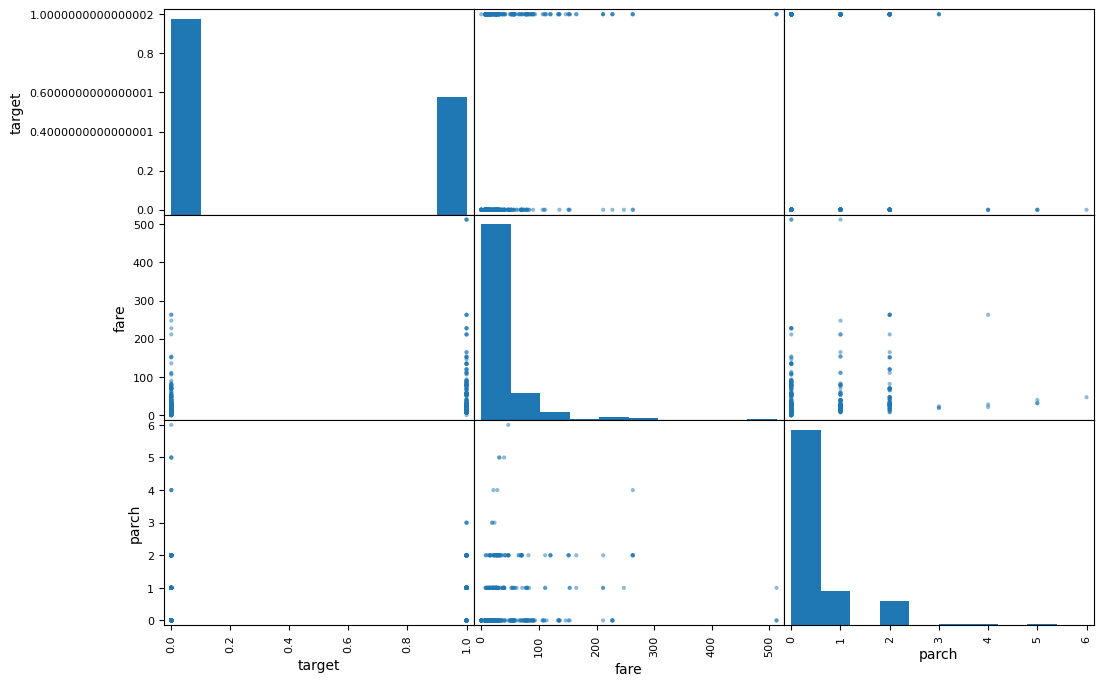

In [55]:
from pandas.plotting import scatter_matrix

attributes = ["target","fare", "parch"]
scatter_matrix(titanic[attributes], figsize=(12,8))
plt.show()

In [56]:
corr_matrix["target"].sort_values(ascending=False)

target    1.000000
fare      0.257307
parch     0.081629
id       -0.005007
sibsip   -0.035322
age      -0.077221
pclass   -0.338481
Name: target, dtype: float64

### Preparing Data For ML

In [57]:
# change the order of pclass to the reverse

In [58]:

titanic["target"].isna().sum()

0

In [59]:
# titanic["target"].hist()
# sns.countplot(titanic, x="target")

### Handle Missing Values

In [60]:
titanic["target"].head()

331    0
733    0
382    0
704    0
813    0
Name: target, dtype: int64

In [61]:
# Split data into labels and feature

titanic_label = titanic["target"].copy()
titanic.drop("target", inplace=True, axis=1)




# 

## Setting up pipeline

In [62]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder, OrdinalEncoder, TargetEncoder,StandardScaler

# Age: With the median -> 28
# Cabin: with the word missing "missing"
# Embarked: with the mode -> s


age_pipeline = Pipeline([
    ("age_imputer", SimpleImputer(strategy="median")),
     ("age_scaler", StandardScaler()),
    ])

cabin_pipeline = Pipeline([
     # ("cabin_imputer", SimpleImputer(fill_value="missing", strategy="constant")),
    ("cabin_encoder", OneHotEncoder(handle_unknown="infrequent_if_exist")),
])

sex_pipeline = Pipeline([
      ("sex_encoder", OneHotEncoder(drop="if_binary")),
])


embarked_pipeline = Pipeline([
    ("embarked_imputer", SimpleImputer(strategy="most_frequent")),
     ("embarked", OneHotEncoder(handle_unknown="infrequent_if_exist")),
])

ticket_pipeline = Pipeline([
    ("ticket_encoder", TargetEncoder()),
])

### Encoding of Categorical Data and Scaling of Data

In [63]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 331 to 102
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        712 non-null    int64  
 1   pclass    712 non-null    int64  
 2   sex       712 non-null    object 
 3   age       572 non-null    float64
 4   sibsip    712 non-null    int64  
 5   parch     712 non-null    int64  
 6   ticket    712 non-null    object 
 7   fare      712 non-null    float64
 8   cabin     712 non-null    object 
 9   embarked  710 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 61.2+ KB


In [64]:
from sklearn.compose import ColumnTransformer 

# Sex: One hot encoding
# Cabin: Frequency encoding | Target encode
# Ticket: Frequency encoding | Target encode
# embarked: One hot encoding


categorical_pipe = ColumnTransformer([
    ("cabin_cat", cabin_pipeline, ["cabin"]),
    ("ticket_cat",ticket_pipeline, ["ticket"]),
    ("sex_cat", sex_pipeline, ["sex"]),
    ("embarked_cat", embarked_pipeline, ["embarked"])
])


numerical_pipeline = ColumnTransformer([
   ("num_data", age_pipeline, ["age"]),
    ("scalers", StandardScaler(), ["sibsip","fare","parch"])
])



In [65]:
from sklearn.ensemble import RandomForestClassifier

full_pipeline = ColumnTransformer([
    ("num_data", numerical_pipeline, ["age", "sibsip","fare","parch"]),
    ("cat_data", categorical_pipe, ["cabin","ticket","sex","embarked"])
], remainder="passthrough")

In [66]:
titanic_prepared = full_pipeline.fit_transform(titanic, titanic_label)

In [67]:
np.isnan(titanic_prepared).sum()

0

## Model selection and training

### using `RandomForestClassifier()`

In [68]:
# using ensemble model
from sklearn.ensemble import RandomForestClassifier



rfc_model = RandomForestClassifier(random_state=42)
rfc_model.fit(titanic_prepared, titanic_label)

RandomForestClassifier(random_state=42)

## Model Evaluation

In [69]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

def calculate_rmse_(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
# yse mse
mse_score = cross_val_score(rfc_model, titanic_prepared, titanic_label, scoring="neg_mean_squared_error", cv=10) 
rmse_score = np.sqrt(-mse_score)
calculate_rmse_(rmse_score)

Scores: [0.44095855 0.47140452 0.54385168 0.3560345  0.42790021 0.42790021
 0.48932261 0.42790021 0.54385168 0.23735633]
Mean: 0.4366480507691093
Standard deviation: 0.08569232518270282


In [70]:
validation_X = valid_data.drop("target", axis=1)
validation_y = valid_data["target"]


transformed_validation_x = full_pipeline.transform(validation_X)
rfc_model.score(transformed_validation_x, validation_y)

0.8603351955307262

In [71]:
# rsme without cross-validation
titanic_survival_prediction = rfc_model.predict(transformed_validation_x)
rfc_mse = mean_squared_error(validation_y, titanic_survival_prediction)
rfc_rmse = np.sqrt(rfc_mse)
rfc_rmse

0.37371754637596794

### Using `GradientBoostingClassifier`

In [72]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_model = GradientBoostingClassifier(random_state=42)
gbc_model.fit(titanic_prepared, titanic_label)

GradientBoostingClassifier(random_state=42)

In [73]:
gbc_mse_score = cross_val_score(gbc_model, titanic_prepared, titanic_label, scoring="neg_mean_squared_error", cv=10)
gbc_rsme_score = np.sqrt(-gbc_mse_score)
calculate_rmse_(gbc_rsme_score)

Scores: [0.372678   0.5        0.50350881 0.26537245 0.33567254 0.41111323
 0.45963856 0.45963856 0.44405304 0.29070095]
Mean: 0.4042376131867945
Standard deviation: 0.08041614556101348


In [74]:
gbc_model.score(transformed_validation_x, validation_y)

0.8379888268156425

In [75]:
gbc_pred_mse = mean_squared_error(validation_y,titanic_survival_prediction)
gbc_rmse = np.sqrt(gbc_pred_mse)
gbc_rmse

0.37371754637596794

## Fine Tuning model

In [76]:
from sklearn.model_selection import RandomizedSearchCV

# RandomForestClassifier parameter grid
rf_param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ["sqrt", 'log2', None],
    'max_depth': [None, 10, 20, 30,],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# GradientBoostingClassifier parameter grid
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['sqrt', 'log2', None]
}


# RandomizedSearchCV for RandomForestClassifier
rf_random_search = RandomizedSearchCV(estimator=rfc_model,
                                      param_distributions=rf_param_grid,
                                      n_iter=100,  # Number of iterations
                                      cv=5,  # 5-fold cross-validation
                                      verbose=2,
                                      random_state=42,
                                      n_jobs=-1, scoring='neg_mean_squared_error')

# RandomizedSearchCV for GradientBoostingClassifier
gb_random_search = RandomizedSearchCV(estimator=gbc_model,
                                      param_distributions=gb_param_grid,
                                      n_iter=100,  # Number of iterations
                                      cv=5,  # 5-fold cross-validation
                                      verbose=2,
                                      random_state=42,
                                      n_jobs=-1, scoring='neg_mean_squared_error')


In [77]:
# Fit the RandomForest model
rf_random_search.fit(titanic_prepared, titanic_label)

# Fit the GradientBoosting model
gb_random_search.fit(titanic_prepared, titanic_label)


Fitting 5 folds for each of 100 candidates, totalling 500 fits



KeyboardInterrupt



In [ ]:
# Best parameters and score for RandomForestClassifier
print("Best RandomForest Parameters:", rf_random_search.best_params_)
print("Best RandomForest Score:", -rf_random_search.best_score_)

# Best parameters and score for GradientBoostingClassifier
print("Best GradientBoosting Parameters:", gb_random_search.best_params_)
print("Best GradientBoosting Score:", -gb_random_search.best_score_)


In [ ]:
rf_ranking = pd.DataFrame(rf_random_search.cv_results_).sort_values(by="rank_test_score").head()
rf_ranking

In [ ]:
gb_ranking = pd.DataFrame(gb_random_search.cv_results_).sort_values(by="rank_test_score").head()
gb_ranking

In [ ]:
titanic_test_df = pd.read_csv("titanic/test.csv")

titanic_test_df.rename(columns={
    "PassengerId": "id", 
    "Pclass":"pclass",
    "Name": "name",
    "Sex": "sex",
    "Age" : "age",
    "SibSp" : "sibsip",
    "Parch": "parch",
    "Ticket":"ticket",
    "Fare":"fare",
    "Cabin" : "cabin",
    "Embarked" : "embarked"
}, inplace=True)

# drop name field

# necesarry preprosing
preprocessing_plcass_cabin(titanic_test_df)

test_X = full_pipeline.transform(titanic_test_df)
test_X

In [ ]:
test_X.dtype

In [ ]:
np.isnan(test_X).sum()

In [ ]:
np.argwhere(np.isnan(test_X))

In [ ]:
# Predict and evaluate the RandomForest model
# Predict and evaluate the RandomForestRegressor model
rf_best_model = rf_random_search.best_estimator_
rf_predictions = rf_best_model.predict(test_X)
# rf_test_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
# print("RandomForest Test RMSE:", rf_test_rmse)

# # Predict and evaluate the GradientBoostingRegressor model
gb_best_model = gb_random_search.best_estimator_
gb_predictions = gb_best_model.predict(test_X)
# gb_test_rmse = np.sqrt(mean_squared_error(y_test, gb_predictions))
# print("GradientBoosting Test RMSE:", gb_test_rmse)

## Saving model

In [ ]:
# Here you can replace pickle with joblib or cloudpickle
from pickle import dump
# with open("gbc_1.pkl", "wb") as f:
#     dump(gb_best_model, f, protocol=5)


In [ ]:
gb_predictions

### For Validation Data

In [ ]:
from sklearn.metrics import confusion_matrix


gb_validation_predictions = gb_best_model.predict(transformed_validation_x)
confusion_matrix(validation_y, gb_validation_predictions)


In [ ]:
rf_validation_predictions = rf_best_model.predict(transformed_validation_x)
confusion_matrix(validation_y, rf_validation_predictions)

In [ ]:
# confusion_matrix()

rf_train_predictions = rf_best_model.predict(titanic_prepared)
confusion_matrix(titanic_label, rf_train_predictions)


# gb_train_predictions = gb_best_model.predict(titanic_prepared)
# confusion_matrix(titanic_label, gb_train_predictions)

### Evaluation of Model (gb and rf)

In [ ]:
from sklearn.metrics import auc,roc_curve,roc_auc

def plot_roc_curve_b(y_true, y_scores, model_name='Model'):
    """
    Plots a ROC curve for a binary classifier.
    
    Parameters:
    y_true: array-like of shape (n_samples,)
        True binary labels (0, 1).
        
    y_scores: array-like of shape (n_samples,)
        Target scores, probabilities for the positive class.
    
    model_name: str, optional (default='Model')
        The name of the model to be displayed on the plot.
    """
    
    # Calculate the ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    # Create the plot
    plt.figure(figsize=(8, 6))
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')

    # Plot the random guess line (AUC = 0.5)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')

    # Beautify the plot
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12)
    plt.ylabel('True Positive Rate (Sensitivity)', fontsize=12)
    plt.title(f'Receiver Operating Characteristic - {model_name}', fontsize=14, weight='bold')
    plt.legend(loc="lower right", fontsize=12)
    plt.grid(alpha=0.3)
    
    # Adding some background styling
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().set_facecolor('whitesmoke')

    plt.show()

def plot_confusion_matrix(y_true, y_pred, labels=None, model_name='Model'):
    """
    Plots a confusion matrix using seaborn heatmap.
    
    Parameters:
    y_true: array-like of shape (n_samples,)
        True binary labels (0, 1).
        
    y_pred: array-like of shape (n_samples,)
        Predicted labels from the classifier.
        
    labels: list of labels for the confusion matrix axes (default=None)
        List of labels for the x and y axis.
        
    model_name: str, optional (default='Model')
        The name of the model to be displayed on the plot.
    """
    
    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Create the plot
    plt.figure(figsize=(8, 6))
    
    # Plot using seaborn heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=labels, yticklabels=labels, annot_kws={"size": 14})
    
    # Add titles and labels
    plt.title(f'Confusion Matrix - {model_name}', fontsize=16, weight='bold')
    plt.xlabel('Predicted Label', fontsize=14)
    plt.ylabel('True Label', fontsize=14)
    
    # Show the plot
    plt.show()

In [ ]:
plot_confusion_matrix(validation_y,rf_validation_predictions, labels=["Survived","Died"], model_name="RandomForest")

In [ ]:
plot_confusion_matrix(validation_y,gb_validation_predictions, labels=["Survived","Died"], model_name="Gradient Boosting")

In [ ]:
gb_validation_predict_prob = gb_best_model.predict_proba(transformed_validation_x)[:,1]
rf_validation_predict_prob = rf_best_model.predict_proba(transformed_validation_x)[:,1]

# rf
plot_roc_curve_b(validation_y,rf_validation_predict_prob,model_name="RandamForest")


In [ ]:
plot_roc_curve_b(validation_y,gb_validation_predict_prob,model_name="Gradient boosting")

### Export first result (gradientboosting)

In [ ]:
# data = {
#     "PassengerId" : titanic_test_df["id"],
#     "Survived" : rf_predictions,
# }
# result_1 = pd.DataFrame(data)

In [ ]:
result_1

In [ ]:
# result_1.to_csv("titanic_rf_2.csv",index=False)

## TODO
- frequency encoding
- TargetEncoder
- Use the Ticket col